我们为这次比赛创建了一个入门教程，它将引导您完成在排行榜上**获得第一个提交结果所需的所有步骤**。在本教程结束时，您将在其中完成自己的机器学习模型的训练并提交结果，同时您还将对如何使用 Kaggle 的在线编码环境有深入的了解。

# Part 1: Get started

# 1.加入比赛！

首先要做的是参加比赛！**打开**一个带有比赛页面的新窗口（[主页点这里](https://www.kaggle.com/competitions/siatprotein2023)）

然后单击“**Join Competition**”按钮。


如果您看到“**Submit Predictions**”按钮而不是“Join Competition”按钮，则表示您已经加入了竞赛，无需再次加入！


# 2.数据集（data)

您可以点击此处[数据集点这里](https://www.kaggle.com/competitions/siatprotein2023/data)获取对应数据集和介绍。
它包括以下几部分。


**(1)“training.csv”（训练数据集）介绍**


-本次比赛的训练数据为csv格式，共包含1593个序列。


-第一列称为“序列（sequence)”，对应不同突变位点的组合。6个字母表示6个位点的氨基酸突变的组合，这6个位点分别是氨基酸的第74，101，143，148，173，176号氨基酸，是我们实际测验出来最有效的突变位点。

-后两列为酶功能评价指标，包括(1)Normalized Activity：酶催化活性的总产量，Rhla-C20和Rhla-C18。(2)Normalized Selectivity：酶的选择性，Rhla-C18与总产量的比值



**(2)"test.csv"（测试数据集）介绍**


-选手您好，这里1300条新数据，包含序列信息并**不包含对应的活性和选择性**。您需要通过**预测**这些序列对应的活性和选择性，并获得反馈来得知自己模型的总体预测能力。

-您可以通过排行榜和对应的分数，获取您的模型与实际数据集之间的**spearman相关系数**得分。来进行您模型的调节。

-赛后公布全部真实值,供大家优化提升



**（3）"sample_submission.csv"（提交结果的案例）介绍**


-这表是您**最后提交的案例**：其中第1列为”test.csv"里对应的序列，第2列为您预测酶的活性的评分，第3列为预测酶的选择性的评分。



# Part 2: 您的编码环境 

在本部分中，你将训练自己的机器学习模型来改进预测。如果您以前从未编写过代码或没有任何机器学习经验，请不要担心！本教程中不假设有任何先前的经验。

# 1.The Notebook 笔记本 

首先要做的是创建一个Kaggle笔记本，你将在其中存储所有代码。您可以使用 Kaggle Notebooks 快速启动并运行编写代码，而无需在计算机上安装任何东西。

（PS:如果您对深度学习感兴趣，kaggle还提供免费的GPU访问！）

首先单击比赛页面上的代码[code](https://www.kaggle.com/competitions/siatprotein2023/code)选项卡。然后，单击**"New Notebook"**。
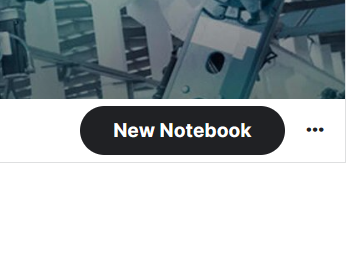

您可以通过单击名称来编辑名称。例如本文“SIAT蛋白竞赛入门”。

# 2.您的第一行代码
您可以使用灰色单元格来编写您的代码，并且点击左侧的“运行”（三角形符号）或点击键盘上的 [Shift] + [Enter]，就可以进行执行。就像下面这样

In [2]:
print("hello world")

hello world


接下来我们用代码获取本次比赛的数据位置：

In [3]:
import numpy as np 
import pandas as pd 

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/siatprotein2023/sample_submission.csv
/kaggle/input/siatprotein2023/training.csv
/kaggle/input/siatprotein2023/test.csv
/kaggle/input/siatprotein2023/Rhla.xlsx


# 3.加载数据

接下来让我们看一看比赛需要用到的数据（上面返回的）大致长什么样：
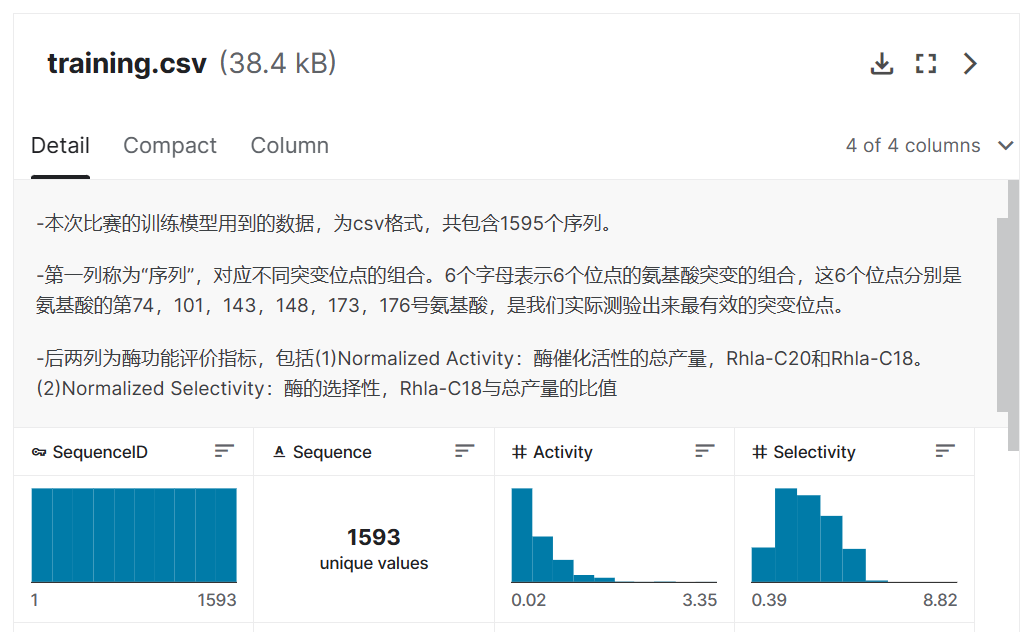

In [4]:
train_data = pd.read_csv("/kaggle/input/siatprotein2023/training.csv")
print("训练数据集：")
train_data.head()

训练数据集：


,SequenceID,Sequence,Activity,Selectivity
0,1,RAQLSQ,1.000,1.000
1,2,AAQLSQ,3.228,1.837
2,3,CAQLSQ,2.170,2.445
3,4,DAQLSQ,1.759,1.061
4,5,EAQLSQ,1.531,1.032


In [5]:
test_data = pd.read_csv("/kaggle/input/siatprotein2023/test.csv")
print("测试数据集：")
test_data.head()

测试数据集：


,SequenceID,Sequence
0,1594,AACCAD
1,1595,AACCTQ
2,1596,AADCSM
3,1597,AADQTQ
4,1598,AADTLQ


In [6]:
sample_data = pd.read_csv("/kaggle/input/siatprotein2023/sample_submission.csv")
print("最后提交的数据格式：")
sample_data.head()

最后提交的数据格式：


,SequenceID,Activity,Selectivity
0,1594,2.043824,0.616243
1,1595,2.641935,2.026498
2,1596,0.956439,0.506145
3,1597,2.279373,0.427398
4,1598,0.056524,1.903379


**请您执行完以上代码后，再进行下一步。**

# Part 3: 您的第一次提交

# 1.模型构建
接下来我们进入到构建机器学习模型的过程：本节的目的是构建出机器学习模型，并对"test.csv"进行预测，最后提交预测结果。

我们这里采用了机器学习库自带的**Tfidf**进行预处理，它通过计算单词在文档中的出现频率来量化其在文档中的重要性。

**TfidfVectorizer**

是一种常用于文本分析的特征提取方法（简写为TF-IDF），在文本分析中，TF-IDF用于反映一个词在文档中的重要性。

在我们的蛋白质突变预测竞赛中，TF-IDF可以用于量化蛋白质序列的特征。具体来说，我们可以将每一个氨基酸视为一个"词"，一条蛋白质序列视为一个"文档"。然后，我们可以使用TF-IDF来计算每个氨基酸在蛋白质序列中的重要性。

**这种方法的优势在于其简单性和有效性，因为它可以捕获每个氨基酸在蛋白质序列中的重要性。然而，这种方法的一个主要缺点是它忽略了氨基酸之间的顺序和相互作用，这在蛋白质中往往非常重要**

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error
from scipy.stats import spearmanr
import pandas as pd
import numpy as np

# 读取excel文件
df = pd.read_csv('/kaggle/input/siatprotein2023/training.csv')

# 提取氨基酸序列
sequences = df.iloc[:, 1].tolist()

# 为预测的目标指标创建标签
activity_labels = df.iloc[:, 2].tolist()
selectivity_labels = df.iloc[:, 3].tolist()

# 定义Pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(analyzer='char')),
    ('rf', RandomForestRegressor(random_state=40))
])

# 定义网格搜索参数
params = {
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'rf__n_estimators': [50, 100],
    'rf__max_depth': [None, 10]
}
# 定义评分函数
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# 划分训练集和测试集
X_train, X_test, y_train_activity, y_test_activity = train_test_split(sequences, activity_labels, test_size=0.2, random_state=42)
_, _, y_train_selectivity, y_test_selectivity = train_test_split(sequences, selectivity_labels, test_size=0.2, random_state=42)

# 为活性和选择性分别进行网格搜索和模型训练
trained_models = {}  # 存储训练好的模型

for y_train, y_test, label in [(y_train_activity, y_test_activity, "Activity"), (y_train_selectivity, y_test_selectivity, "Selectivity")]:
    grid_search = GridSearchCV(pipeline, params, cv=5, scoring=scorer)
    grid_search.fit(X_train, y_train)

    # 输出最佳参数
    print(f"Best parameters for {label}: ", grid_search.best_params_)
    # 使用最佳模型进行预测
    preds = grid_search.predict(X_test)
    # 输出预测结果的RMSE
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    print(f"{label} RMSE: {rmse}")
    # 计算平均绝对误差
    mae = mean_absolute_error(y_test, preds)
    print(f"{label} MAE: {mae}")
    # 计算Spearman秩相关系数
    spearman = spearmanr(y_test, preds)[0]
    print(f"{label} Spearman: {spearman}\n")

    # 存储训练好的模型
    trained_models[label] = grid_search.best_estimator_

Best parameters for Activity:  {'rf__max_depth': None, 'rf__n_estimators': 100, 'tfidf__ngram_range': (1, 2)}
Activity RMSE: 0.30650981135559596
Activity MAE: 0.19664463987162267
Activity Spearman: 0.7800525200683127

Best parameters for Selectivity:  {'rf__max_depth': None, 'rf__n_estimators': 100, 'tfidf__ngram_range': (1, 2)}
Selectivity RMSE: 0.8674016385095131
Selectivity MAE: 0.6515142962382445
Selectivity Spearman: 0.548986000514679



完成模型的训练之后，我们利用训练好的模型来对测试集("test.csv")进行预测:

In [14]:
# 读取测试数据
test_data = pd.read_csv("/kaggle/input/siatprotein2023/test.csv")
# 提取测试数据的氨基酸序列
test_sequences = test_data['Sequence'].tolist()

# 使用训练好的模型进行预测
result_df = pd.DataFrame()
result_df['SequenceID'] = test_data['SequenceID']

for label in ["Activity", "Selectivity"]:
    preds = trained_models[label].predict(test_sequences)
    result_df[label] = preds

# 将结果保存为csv文件
result_df.to_csv('predictions.csv', index=False)
print("Your submission was successfully saved!")
#查看结果，确保格式正确后提交
print(result_df)

Your submission was successfully saved!
     SequenceID  Activity  Selectivity
0          1594   0.67772      2.95646
1          1595   0.84560      2.96947
2          1596   0.70136      2.12447
3          1597   0.61895      2.13178
4          1598   0.71821      2.25839
..          ...       ...          ...
920        2514   0.20146      2.81452
921        2515   0.19217      1.99549
922        2516   0.13122      2.75432
923        2517   0.33409      1.95268
924        2518   0.13088      3.24075

[925 rows x 3 columns]


# 2.提交预测结果

（1）以上一切运行完成后，单击笔记本右上角的**"Save Version"** 按钮。这将生成一个弹出窗口

（2）确保选中**"Save and Run All"** 选项，然后单击"Save"按钮。

（3）这会在笔记本的左下角生成一个窗口。运行完成后，单击"Save Version"按钮右侧的数字。这将在屏幕右侧拉出一个版本列表。单击最新版本右侧的省略号 （...），然后选择“Open in Viewer”

（4）单击屏幕顶部的“Data”选项卡。然后，单击**"Submit"** 按钮以提交您的结果。

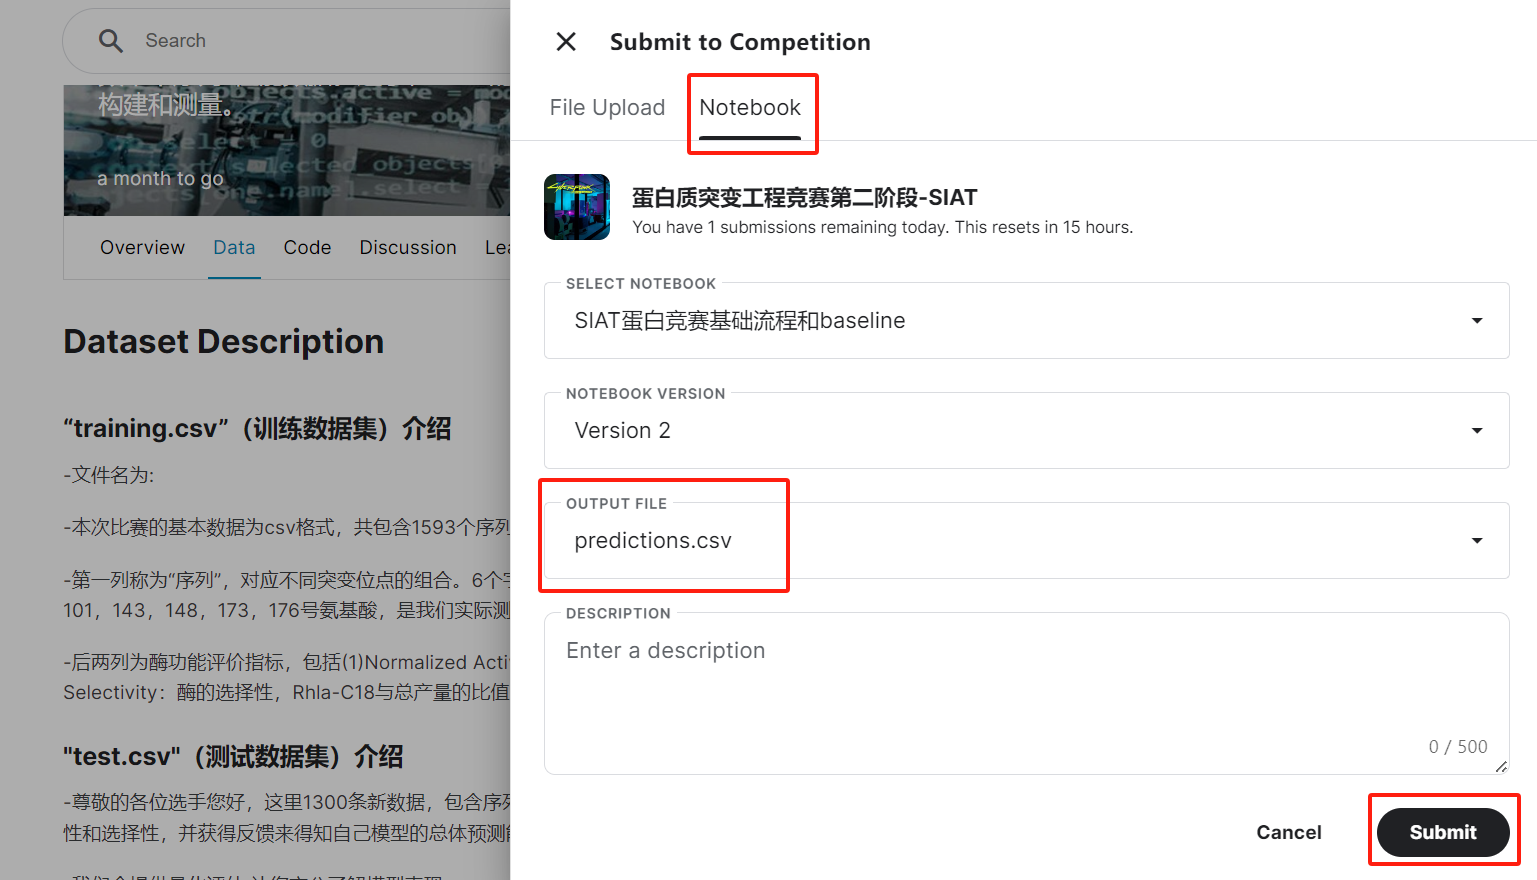